### Multiple Linear Regression

### Bike sharing case study

#### Objective: 
**To model the demand for shared bikes with available independent variables and understand how exactly Bike sharing demands vary with different features**.  

#### Importing necessary libraries and Understanding Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#suppress warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importing data 
data = pd.read_csv('E:/Upgrad/Probability/day.csv')

In [3]:
#The first five rows of data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

In [7]:
# To check if there is any null data
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# To check the column labels 
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Data cleaning: dropping unnecessary columns

In [9]:
#instant is an index column, so we can drop it
data.drop(['instant'],axis=1,inplace=True)

#dropping dteday as yr column giving same information regarding year
data.drop(['dteday'],axis=1,inplace=True)

#dropping casual and registered column as cnt column include both columns (casual+registered=cnt) 
data.drop(['casual', 'registered'],axis=1,inplace=True)

In [10]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
data.shape

(730, 12)

In [14]:
#statistics of numerical variable
data[["temp", "atemp", "hum", "windspeed"]].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [15]:
# Correlation between 'hum', 'windspeed', 'temp' and 'atemp' columns
crln = data[['hum', 'windspeed', 'temp', 'atemp']].corr()
crln

,hum,windspeed,temp,atemp
hum,1.000000,-0.248506,0.128565,0.141512
windspeed,-0.248506,1.000000,-0.158186,-0.183876
temp,0.128565,-0.158186,1.000000,0.991696
atemp,0.141512,-0.183876,0.991696,1.000000


- Here we can see there is greater correlation  between 'atemp' which is feeling temperature and 'temp' which is actual temperature. So, we can drop 'atemp' column.

In [16]:
#As there is greater correlation between temp and atemp, we can drop atemp column
data.drop(["atemp"],axis=1,inplace=True)

In [17]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [18]:
#As season, weekday, month and weathersit are categorical variables, we will replace these with labels
data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
data.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
data.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}, inplace=True)
data.weathersit.replace({1:'Clear', 2:'Cloudy', 3:'Thunderstorm'}, inplace=True)


In [19]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Data visualisation

##### Pairplot to understand linear relationship between numerical variables

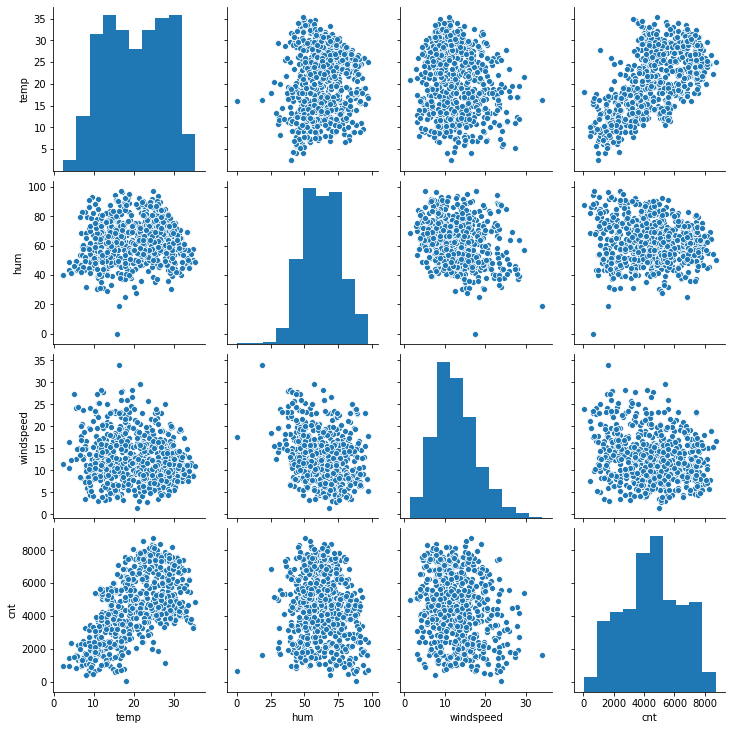

In [21]:
sns.pairplot(data, vars=['temp','hum','windspeed',"cnt"])
plt.show()

- "temp" has a greate correlation with "cnt" target variable
- Thus we can say that cnt (total rental bikes) depends on temp (environmental Temperature) 

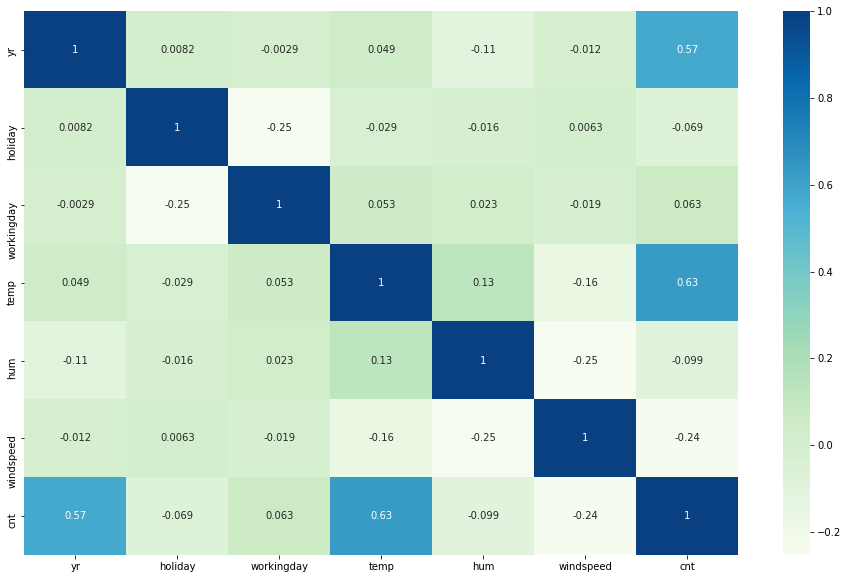

In [22]:
#let check the correlation using heatmap for categorical variables
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="GnBu")
plt.show()

- From given heatmap we can see that "cnt" target variable is linearly dependent on "temp" (temperature) and "yr" (year).
- Thus there is positive correlation between "cnt" and "windspeed", "holiday", "hum"
- There is negative correlation between "cnt" and "temp", "workingday", "yr"

#### Creating dummy variables

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [24]:
#Now we will create dummy variables
#This will Drop original variables for which dummy variable created

data = pd.get_dummies(data, drop_first=True)

#Changes after dummy creation 
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   hum                      730 non-null    float64
 5   windspeed                730 non-null    float64
 6   cnt                      730 non-null    int64  
 7   season_spring            730 non-null    uint8  
 8   season_summer            730 non-null    uint8  
 9   season_winter            730 non-null    uint8  
 10  mnth_August              730 non-null    uint8  
 11  mnth_Dec                 730 non-null    uint8  
 12  mnth_Feb                 730 non-null    uint8  
 13  mnth_Jan                 730 non-null    uint8  
 14  mnth_July                7

In [25]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the data as train and test sets

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Rescaling numerical features
- There are two ways of rescaling:
  1. Min-Max scaling
  2. Standardisation (mean-0, sigma-1)
- Here we will use Min-Max scaling

In [29]:
#Import minmax scaling library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


#### Dividing into X and Y sets for the model building

In [32]:
y_train = data_train.pop('cnt')
X_train = data_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building our model

Here we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
#RFE approach for feature selection
# Running RFE with the output number of the variable equal to 15

ln = LinearRegression()
ln.fit(X_train, y_train)

rfe = RFE(ln, 15) # running RFE
rfe = rfe.fit(X_train, y_train)


In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thur', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Thunderstorm', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_July', 'mnth_Sept', 'weekday_Sat', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_Dec', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

ln = sm.OLS(y_train,X_train_rfe1).fit() # Running the linear model
ln.params

const                      0.251042
yr                         0.230502
holiday                   -0.058529
workingday                 0.043521
temp                       0.509836
hum                       -0.154716
windspeed                 -0.185956
season_spring             -0.050806
season_summer              0.049660
season_winter              0.094426
mnth_Jan                  -0.034326
mnth_July                 -0.053193
mnth_Sept                  0.081186
weekday_Sat                0.053721
weathersit_Cloudy         -0.057824
weathersit_Thunderstorm   -0.248777
dtype: float64

In [41]:
#Let's see the summary of our linear model
print(ln.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.31e-191
Time:                        21:23:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe that will contain the names of all the features.
vif = pd.DataFrame()
vif['Parameters'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Parameters,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_Cloudy,2.29
0,yr,2.09
12,weekday_Sat,1.98


- We want VIF that is less than 5. So, there are clearly some variables we need to drop.


- As the 'hum' has high VIF of '29.40', so we will drop this variable

In [43]:
#As 'hum' has high VIF, we can drop it
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [44]:
import statsmodels.api as sm

# Add a constant from train set
X_train_rfe2 = sm.add_constant(X_train_rfe)

# Create a first fitted Linear Regression model using VIF check
ln1 = sm.OLS(y_train, X_train_rfe2).fit()
print(ln1.params)
print (ln1.summary(), '\n')

const                      0.173663
yr                         0.234361
holiday                   -0.056199
workingday                 0.046502
temp                       0.472823
windspeed                 -0.156264
season_spring             -0.059704
season_summer              0.043352
season_winter              0.079699
mnth_Jan                  -0.038947
mnth_July                 -0.048222
mnth_Sept                  0.075318
weekday_Sat                0.058434
weathersit_Cloudy         -0.082621
weathersit_Thunderstorm   -0.291727
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.33e-189
Time:                        21:23:53   Log-Likeli

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_July,1.59


#### Model 2
- As the 'workingday' has high VIF of '5.24', so we will drop this variable

In [47]:
#As 'workingday' has high VIF, we can drop it
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

- Rebuilding the model without `workingday`

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_rfe)
ln2 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(ln2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.21e-186
Time:                        21:23:54   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,season_spring,2.76
5,season_summer,2.23
0,yr,2.07
6,season_winter,1.80
7,mnth_Jan,1.61
8,mnth_July,1.59
11,weathersit_Cloudy,1.56
9,mnth_Sept,1.34


#### Model 3
- - As the 'windspeed' has high VIF of '4.64', so we will drop this variable

In [50]:
X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [51]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
ln3 = sm.OLS(y_train,X_train_rfe4).fit()
print(ln3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.02e-179
Time:                        21:23:54   Log-Likelihood:                 483.90
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.34
0,yr,2.07
3,season_spring,2.02
4,season_summer,1.94
5,season_winter,1.60
6,mnth_Jan,1.60
7,mnth_July,1.59
10,weathersit_Cloudy,1.56
8,mnth_Sept,1.34
9,weekday_Sat,1.19


#### Model 4
- Dropping 'mnth_Jan' as it has high P value of '0.194'. so we drop it.

In [53]:
X_train_rfe = X_train_rfe.drop(['mnth_Jan'], axis=1)

In [54]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
ln4 = sm.OLS(y_train,X_train_rfe5).fit()
print(ln4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.57e-180
Time:                        21:23:55   Log-Likelihood:                 483.04
No. Observations:                 510   AIC:                            -942.1
Df Residuals:                     498   BIC:                            -891.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.07
4,season_summer,1.93
5,season_winter,1.60
6,mnth_July,1.58
9,weathersit_Cloudy,1.55
3,season_spring,1.43
7,mnth_Sept,1.34
8,weekday_Sat,1.19
10,weathersit_Thunderstorm,1.07


#### Model 5
- Dropping 'weekday_Sat' as it has high P value of '0.151'. So, we drop it.

In [56]:
X_train_rfe = X_train_rfe.drop(['weekday_Sat'], axis=1)

In [57]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
ln5 = sm.OLS(y_train,X_train_rfe5).fit()
print(ln5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.80e-181
Time:                        21:23:55   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,season_summer,1.93
5,season_winter,1.58
6,mnth_July,1.58
8,weathersit_Cloudy,1.55
3,season_spring,1.40
7,mnth_Sept,1.34
9,weathersit_Thunderstorm,1.07
1,holiday,1.04


#### Model 6
- Dropping 'season_summer' as it has high P value of '0.024'. So, we drop it.

In [59]:
X_train_rfe = X_train_rfe.drop(['season_summer'], axis=1)

In [60]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
ln6 = sm.OLS(y_train,X_train_rfe7).fit()
print(ln6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.16e-181
Time:                        21:23:56   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
7,weathersit_Cloudy,1.51
4,season_winter,1.33
5,mnth_July,1.33
3,season_spring,1.25
6,mnth_Sept,1.19
8,weathersit_Thunderstorm,1.06
1,holiday,1.04


### Residual Analysis of the train data

So, to check if the error terms are also normally distributed, plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_pred = ln6.predict(X_train_rfe7)

In [63]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

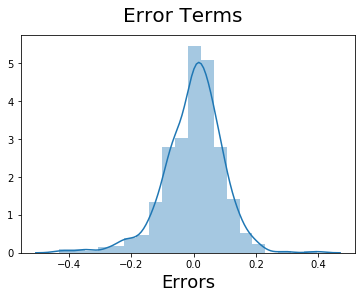

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

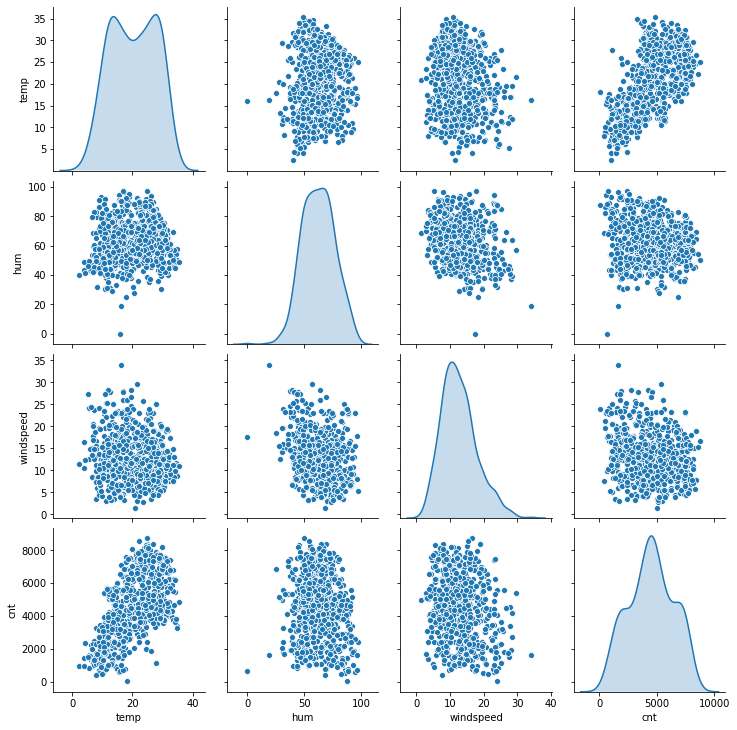

In [65]:
num_vars = data[['temp','hum','windspeed','cnt']]

sns.pairplot(num_vars, diag_kind='kde')
plt.show()
#data_test[num_vars] = scaler.transform(data_test[num_vars])

In [66]:
#checking columns
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'mnth_July', 'mnth_Sept', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')

In [67]:
print(X_train_rfe7.shape)
print(res.shape)

(510, 10)
(510,)


### Final Prediction and Evaluation

In [68]:
#scaling data
num_vars = ['temp','hum','windspeed','cnt']
data_test[num_vars] = scaler.fit_transform(data_test[num_vars]) 

#### Dividing into X_test and y_test

In [69]:
#Creating x and y sets

y_test = data_test.pop('cnt')
X_test = data_test

In [70]:
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'mnth_July', 'mnth_Sept', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')

### Model Evaluation

In [71]:
X_train_new=X_train_rfe7.drop(['const'], axis=1)

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'mnth_July', 'mnth_Sept', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')

In [74]:
# Making predictions
y_pred = ln6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

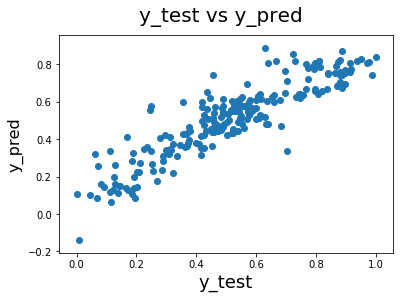

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- Predicted vs observed value plots shows that the model is reasonably accurate.

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10510537504333058

In [77]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.805228096430141

In [78]:
X_t=X_train_new.iloc[:,0].values

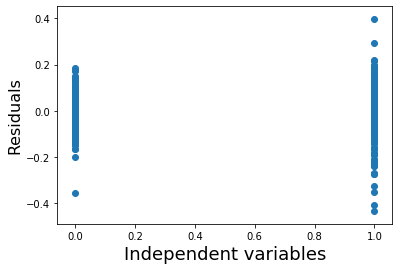

In [79]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [80]:
print(X_train_rfe7.columns)
print(ln6.summary())

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'mnth_July', 'mnth_Sept', 'weathersit_Cloudy',
       'weathersit_Thunderstorm'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.16e-181
Time:                        21:24:05   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        

**So, the equation for target variable 'cnt' is:
cnt = 0.193 + 0.233 x yr - 0.101 x holiday + 0.471 x temp - 0.1107 x season_spring + 0.0558 x season_winter - 0.0688 x mnth_July + 0.0658 x mnth_Sept - 0.0796 x weathersit_Cloudy - 0.3002 x weathersit_Thunderstorm**          

**Bike share demand depends on variables: yr, holiday, temp, spring season, winter season, July month, sept month, cloudy and Thuderstorm weathers**

**Bike share demand increases every year, and will be more in winter season and in September month.
If holidays are less, then demand will be more for bikes. It will be less in spring season, and in July month. Also if weather is cloudy and thunderstorm is there, then demand will be less.**